In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils as util
from construct_model_matrices_internal import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
DATA_DIR = '../../data/Xy_internal_split_data'

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv'] 
  ['y_train_1998.csv', 'y_train_1999.csv', 'y_train_2000.csv', 'y_train_2001.csv', 'y_train_2002.csv', 'y_train_2003.csv', 'y_train_2004.csv', 'y_train_2005.csv', 'y_train_2006.csv', 'y_train_2007.csv', 'y_train_2008.csv', 'y_train_2009.csv', 'y_train_2010.csv', 'y_train_2011.csv', 'y_train_2012.csv', 'y_train_2013.csv', 'y_train_2014.csv', 'y_train_2015.csv']
Valid:
  ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.cs

In [4]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [5]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (473922, 118)
 y: (473922, 1)
Valid:
 X: (358866, 118)
 y: (358866, 1)
Test:
 X: (154296, 118)
 y: (154296, 1)


In [6]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:
cv.gsp:	979


In [7]:
max(X_test.x), max(X_test.y)

(195, 358)

In [8]:
X_train.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,age:density,age:summerTmean,age:summerP0,age:ddAugJul,density:JanTmin,density:Tmean,density:OptTsum,density:wd,density:mi,density:ddAugJul
0,37,68,-119.110980,35.837349,141,0,0,0,0.0,685.590759,...,0.000000e+00,0.000000,0.000000,0.0,2849.248599,13271.878842,5.416167e+04,-8.075468e+04,240.304257,6.825742e+06
1,38,68,-119.003126,35.859120,194,0,0,0,0.0,6174.752441,...,0.000000e+00,0.000000,0.000000,0.0,26398.570367,120484.422356,4.878054e+05,-5.832296e+05,2413.675907,6.068547e+07
2,39,68,-118.895219,35.880769,292,0,0,1,0.0,7538.154297,...,0.000000e+00,0.000000,0.000000,0.0,30480.630737,145796.396949,6.332050e+05,-4.459307e+05,3287.255430,7.131848e+07
3,40,68,-118.787258,35.902297,635,0,0,1,0.0,10577.365234,...,0.000000e+00,0.000000,0.000000,0.0,29730.031836,194388.042347,9.731176e+05,3.448271e+04,5304.876314,8.909315e+07
4,41,68,-118.679245,35.923705,1250,1,1,1,38.0,41283.019531,...,1.568755e+06,934.921657,1214.648905,244112.0,260.140945,641190.243919,3.467774e+06,1.125593e+07,27461.411519,2.652021e+08


In [9]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density', cell_dim=1)
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density', cell_dim=1)
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density', cell_dim=1)

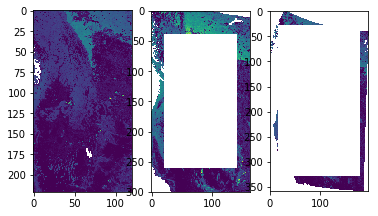

In [10]:
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [11]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1', cell_dim=1)

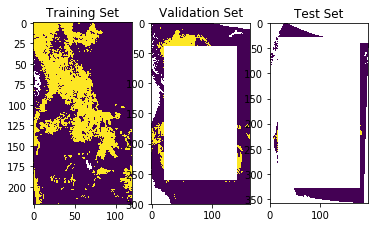

In [12]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [13]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 20.82%
Percent presence in y_valid: 7.73%
Percent presence in y_test: 1.21%


In [14]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 20.82)
print('  valid:', 100 - 7.73)
print('  test: ', 100 - 1.21)

Baseline accuracy if predicting "absent" for all cells:
  train: 79.18
  valid: 92.27
  test:  98.79


In [15]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [16]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [17]:
predictors = list(X_train)

In [18]:
def drop_NA(df):
    df = df[df.columns.drop(list(df.filter(regex='cv.gsp')))]
    return df

In [19]:
X_train = drop_NA(X_train)
X_valid = drop_NA(X_valid)
X_test = drop_NA(X_test)

In [20]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [21]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [22]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [23]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1','l2']: #['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9565
Elapsed time: 0.21 minutes
  l2: 0.9573
Elapsed time: 0.56 minutes
Testing C = 0.001
  l1: 0.9568
Elapsed time: 0.91 minutes
  l2: 0.9569
Elapsed time: 1.36 minutes
Testing C = 0.01
  l1: 0.9568
Elapsed time: 3.71 minutes
  l2: 0.9569
Elapsed time: 4.71 minutes
Testing C = 0.1
  l1: 0.9568
Elapsed time: 42.31 minutes
  l2: 0.9569
Elapsed time: 44.18 minutes
Testing C = 1.0
  l1: 0.9568
Elapsed time: 147.17 minutes
  l2: 0.9568
Elapsed time: 154.04 minutes


In [24]:
!say "I'm done"

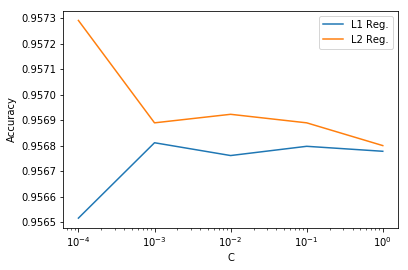

In [25]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [26]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-3.5, -1.5, 10)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.00031622776601683794
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9569
Elapsed time: 0.20 minutes
  l2: 0.9572
Elapsed time: 0.50 minutes
Testing C = 0.0005274997063702619
  l1: 0.9571
Elapsed time: 0.78 minutes
  l2: 0.957
Elapsed time: 1.12 minutes
Testing C = 0.0008799225435691075
  l1: 0.9568
Elapsed time: 1.37 minutes
  l2: 0.9569
Elapsed time: 2.22 minutes
Testing C = 0.0014677992676220691
  l1: 0.9567
Elapsed time: 3.15 minutes
  l2: 0.9569
Elapsed time: 4.50 minutes
Testing C = 0.002448436746822227
  l1: 0.9568
Elapsed time: 6.30 minutes
  l2: 0.9569
Elapsed time: 7.64 minutes
Testing C = 0.004084238652674522
  l1: 0.9568
Elapsed time: 9.42 minutes
  l2: 0.9569
Elapsed time: 11.07 minutes
Testing C = 0.006812920690579608
  l1: 0.9567
Elapsed time: 13.71 minutes
  l2: 0.9569
Elapsed time: 16.02 minutes
Testing C = 0.011364636663857243
  l1: 0.9568
Elapsed time: 21.08 minutes
  l2: 0.9569
Elapsed time: 23.64 minutes
Testing C = 0.018957356524063752
  l1: 0.9569
Elapsed time: 39.19 minutes
  l2: 0.9569
Elapsed time: 42.00 minutes
Testing C = 0

In [27]:
!say "I'm done"

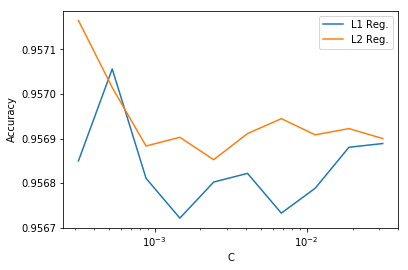

In [28]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [29]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.00031622776601683794, 0.9571650699704067),
 (0.0005274997063702619, 0.9570145959773286),
 (0.0008799225435691075, 0.956883627872242),
 (0.0014677992676220691, 0.9569031337602336),
 (0.002448436746822227, 0.9568529757625409),
 (0.004084238652674522, 0.9569114934265157),
 (0.006812920690579608, 0.9569449320916442),
 (0.011364636663857243, 0.9569087068710884),
 (0.018957356524063752, 0.9569226396482252),
 (0.03162277660168379, 0.9569003472048062)]

In [30]:
best_C = 0.00031622776601683794

In [31]:
logistic_clf = LogisticRegression(C=best_C, penalty='l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.9917949914450148

In [32]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[0.99794631 0.00205369]
 [0.99705015 0.00294985]
 [0.99745343 0.00254657]
 [0.99779886 0.00220114]
 [0.99779001 0.00220999]]


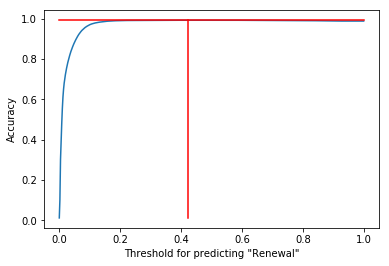

{'threshold': 0.4228456913827655, 'accuracy': 0.9919116503344222}


In [33]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [34]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	863		1010
        0	256		152167
Accuracy:  0.9917949914450148
Precision: 0.7712243074173369
Recall:    0.4607581420181527
F1:        0.5768716577540106


In [35]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	960		913
        0	335		152088
Accuracy:  0.9919116503344222
Precision: 0.7413127413127413
Recall:    0.5125467164975974
F1:        0.606060606060606


In [36]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9770365493709112


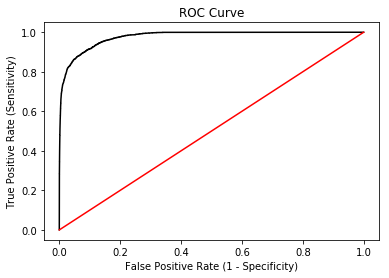

In [37]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [38]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
8,sum9_t1,0.688818
5,vgt,0.585238
3,btl_t1,0.366813
4,btl_t2,0.274126
9,sum9_t2,0.263137
61,JanMin,-0.190754
19,fallTmean,-0.176637
24,summerP1,-0.158623
57,winter20,-0.135728
82,PMarAug_sq,-0.132593


In [39]:
print(full_train.shape)

(473922, 119)


In [40]:
logistic_clf.predict_proba(X_train)

array([[0.99829479, 0.00170521],
       [0.99825508, 0.00174492],
       [0.99358536, 0.00641464],
       ...,
       [0.99604485, 0.00395515],
       [0.99595901, 0.00404099],
       [0.99507597, 0.00492403]])

In [41]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [42]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,age:ddAugJul,density:JanTmin,density:Tmean,density:OptTsum,density:wd,density:mi,density:ddAugJul,btl_t,probs,preds
0,164,0,-104.676159,31.434503,1227,0,0,0,0.0,847.500488,...,0.0,-682.563771,14677.804535,77970.044922,9992.149656,463.728120,7.502922e+06,0,0.002054,0
1,165,0,-104.572405,31.439746,1570,0,0,0,0.0,1251.626587,...,0.0,-2743.434366,19347.301107,115149.645996,60921.833632,720.751640,1.012316e+07,0,0.002950,0
2,166,0,-104.468639,31.444873,1308,0,0,0,0.0,4498.790527,...,0.0,-6195.654439,75077.165423,413888.728515,270538.104990,2635.547257,3.783933e+07,0,0.002547,0
3,167,0,-104.364863,31.449881,1218,0,0,0,0.0,468.264038,...,0.0,-543.789977,8051.323996,43080.291504,27046.069544,278.252754,4.110422e+06,0,0.002201,0
4,168,0,-104.261077,31.454772,1167,0,0,0,0.0,3425.574951,...,0.0,-3234.618706,60060.967617,308301.745605,218041.219767,2059.538789,3.076166e+07,0,0.002210,0


In [43]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [44]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t', cell_dim=1)
    pred_matrix   = util.column2matrix(data_year, pred_type, cell_dim=1)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

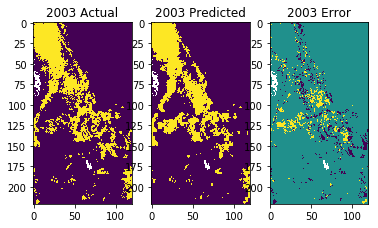

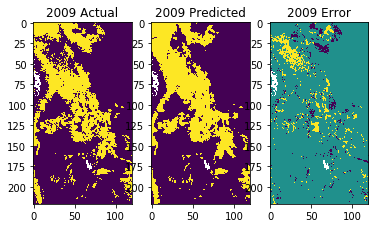

In [45]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

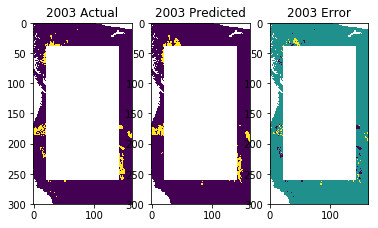

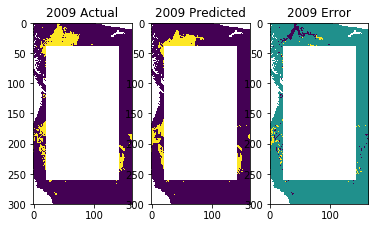

In [46]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

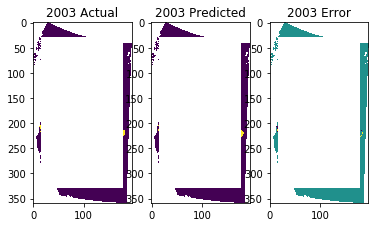

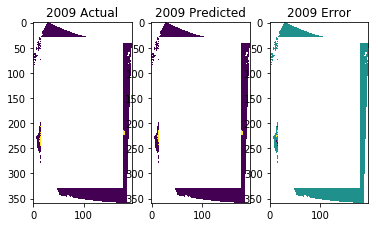

In [47]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [48]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

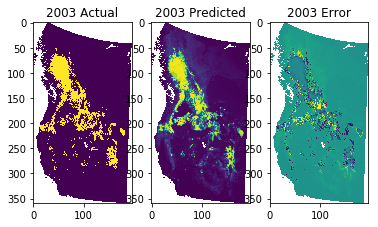

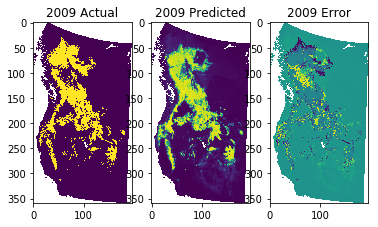

In [49]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)